# Task 1

---

## Web scraping and analysis

Web scraping involves extracting information from the Internet. In this task, we will use a package called `BeautifulSoup` to collect the data from the web. Once the data is collected, we will save it into a local `.csv` file for our analysis.

### Scraping data from Skytrax

Visiting [https://www.airlinequality.com], there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

Navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [1]:
# Importing the necessary libraries.
# Make sure that you have all these libaries available to run the code successfully

import requests
from bs4 import BeautifulSoup
import pandas as pd


from wordcloud import WordCloud
from wordcloud import STOPWORDS
import string

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

#Sentiment analysis tool
from textblob import TextBlob


# plotting packages
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# The base URL represents the path to the search functionality of the website. 

base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 20
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews
Scraping page 11
   ---> 1100 total reviews
Scraping page 12
   ---> 1200 total reviews
Scraping page 13
   ---> 1300 total reviews
Scraping page 14
   ---> 1400 total reviews
Scraping page 15
   ---> 1500 total reviews
Scraping page 16
   ---> 1600 total reviews
Scraping page 17
   ---> 1700 total reviews
Scraping page 18
   ---> 1800 total reviews
Scraping page 19
   ---> 1900 total reviews
Scraping page 20
   ---> 2000 total reviews


In [3]:
df = pd.DataFrame()
df["reviews"] = reviews
df

,reviews
0,✅ Trip Verified | Having not flown with BA fo...
1,✅ Trip Verified | Dear Community I feel compel...
2,✅ Trip Verified | Quick bag drop at First Win...
3,✅ Trip Verified | 4 Hours before takeoff we r...
4,✅ Trip Verified | I recently had a delay on B...
...,...
1995,✅ Verified Review | I booked flights with Bri...
1996,✅ Verified Review | The space provided for bu...
1997,London Heathrow to Washington Dulles with Brit...
1998,✅ Verified Review | Barcelona to London. Has ...


In [4]:
df.to_csv("data/BA_reviews1.csv")

Now I have my dataset for this task! The loops above collected about 2000 reviews by iterating through the paginated pages on the website.

### Text Preprocessing:  Data Cleaning
Next, I clean the data by removing irrelevant characters, stopwords, and any noise that might affect the analysis. This step is essential to ensure accurate and meaningful results. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

In [5]:
# Spilt the reviews column into two columns
data_df_new = df["reviews"].str.split("|", n = 1, expand = True)

# Drop column 0 that contains "Not Verified" and "Verified"
data_df_new.drop(0, inplace=True, axis=1)

In [6]:
# Drop any invalid infomation
data_df_new = data_df_new.dropna()

In [7]:
# Renamed the column from 1 to reviews
data_df_new=data_df_new.rename(columns={1: "reviews"})
data_df_new

,reviews
0,"Having not flown with BA for a few years, I ..."
1,Dear Community I feel compelled to share the ...
2,Quick bag drop at First Wing but too many pa...
3,4 Hours before takeoff we received a Mail st...
4,I recently had a delay on British Airways fr...
...,...
1990,Flew British Airways from Johannesburg to Lon...
1993,"Sofia to London Heathrow, and the flight was..."
1995,I booked flights with British Airways from L...
1996,The space provided for business class seats ...


In [8]:
# Change to lowercase
data_df_new['reviews'] = data_df_new['reviews'].str.lower()

In [9]:
data_df_new

,reviews
0,"having not flown with ba for a few years, i ..."
1,dear community i feel compelled to share the ...
2,quick bag drop at first wing but too many pa...
3,4 hours before takeoff we received a mail st...
4,i recently had a delay on british airways fr...
...,...
1990,flew british airways from johannesburg to lon...
1993,"sofia to london heathrow, and the flight was..."
1995,i booked flights with british airways from l...
1996,the space provided for business class seats ...


### Remove stopwords

Next, I removed stop words, punctuation, and common words that may not contribute significantly to the analysis. This step helps streamline the text for meaningful representation. 

In [10]:
# Removing punctuation
## The `string.punctuation` string contains all ASCII punctuation characters.

data_df_new['reviews'] = data_df_new['reviews'].apply(lambda x: ''.join([char for char in x if char not in string.punctuation]))

In [11]:
# Removing stopwords


stop_words = set(stopwords.words('english'))


data_df_new['reviews'] = data_df_new['reviews'].apply(lambda x: ' '.join([word for word in word_tokenize(x) if word.lower() not in stop_words]))

In [12]:
# without stopwords
data_df_new

,reviews
0,flown ba years read reviews preparation needle...
1,dear community feel compelled share utter frus...
2,quick bag drop first wing many passengers use ...
3,4 hours takeoff received mail stating cryptic ...
4,recently delay british airways bru lhr due sta...
...,...
1990,flew british airways johannesburg london heath...
1993,sofia london heathrow flight time however cabi...
1995,booked flights british airways londonkuala lum...
1996,space provided business class seats flight lud...


### WordCloud Generation:

Next, I utilize a WordCloud library or tool to create a visual representation of the most frequently occurring words in the text. Larger and bolder words in the WordCloud indicate higher frequency.

In [13]:
# Generate WordCloud

wordcloud = WordCloud(width=800, height=400, background_color='black').generate(' '.join(data_df_new['reviews']))


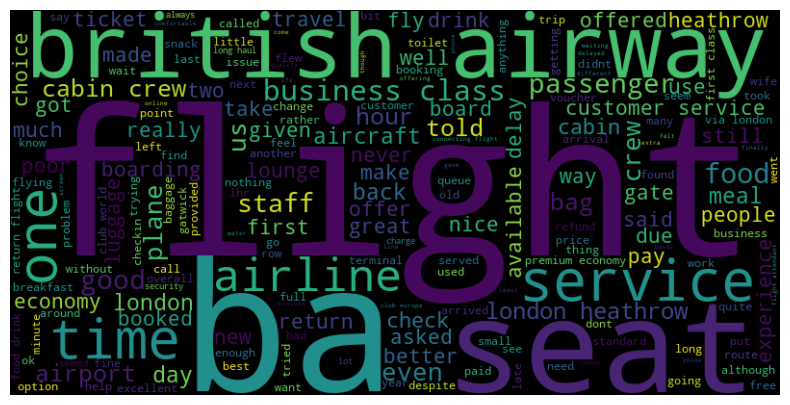

In [14]:
# Display the WordCloud using Matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### Customized stopwords:

I created my own list of stopwords that I want to exclude from the WordCloud. Then I combine my custom stopwords with the default stopwords provided by the WordCloud library. You can adjust the custom_stopwords list according to the specific words you want to exclude.

In [15]:
custom_stop_words = ['flight','flights', 'airline','ba', 'british airways', 'british airway', 'british', 'airway','airways', 'Airways','u']
stop_words = set(list(STOPWORDS) + custom_stop_words)

In [16]:
# Generate the new WordCloud
wordcloud_new = WordCloud(width=800, height=400, background_color='black', stopwords = stop_words).generate(' '.join(data_df_new['reviews']))

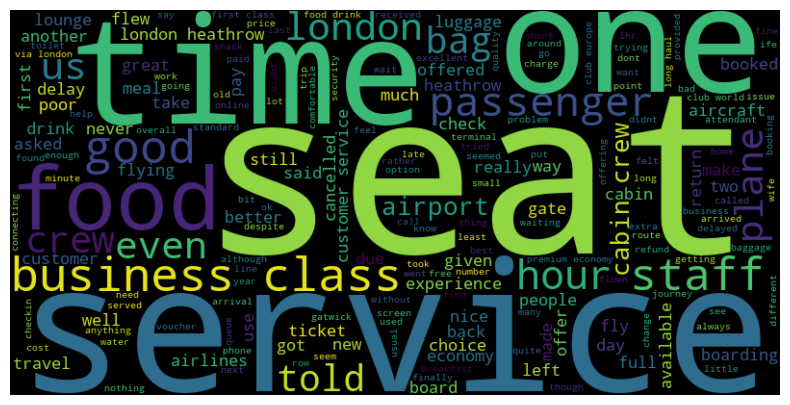

In [17]:
# Display the new WordCloud using Matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_new, interpolation='bilinear')
plt.axis('off')
plt.show()

### Frequent Analysis
Next, we find the most frequent words in the reviews. The `FreqDist` class is used to encode “frequency distributions”, which count the number of times that each outcome of an experiment occurs. Alternatetively, we can define a function to remove stopwords.

In [18]:
# function to remove stopwords
def remove_stopwords(word):
    new = " ".join([i for i in word if i not in stop_words])
    return new

In [19]:
# remove short words (length < 3)
data_df_new['reviews'] = data_df_new['reviews'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>2]))

# remove stopwords from the text
reviews1 = [remove_stopwords(r.split()) for r in data_df_new['reviews']]

# make entire text lowercase
reviews1 = [r.lower() for r in reviews1]

In [20]:
from nltk.probability import FreqDist
# function to plot most frequent terms
def freq_words(x, terms = 20):
  all_words = ' '.join([text for text in x])
  all_words = all_words.split()

  fdist = FreqDist(all_words)
  words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})

  # selecting top 20 most frequent words
  d = words_df.nlargest(columns="count", n = terms) 
  plt.figure(figsize=(15,5))
  ax = sns.barplot(data=d, x= "word", y = "count")
  plt.xticks(rotation=70)
  ax.set(ylabel = 'Count')
  plt.show()

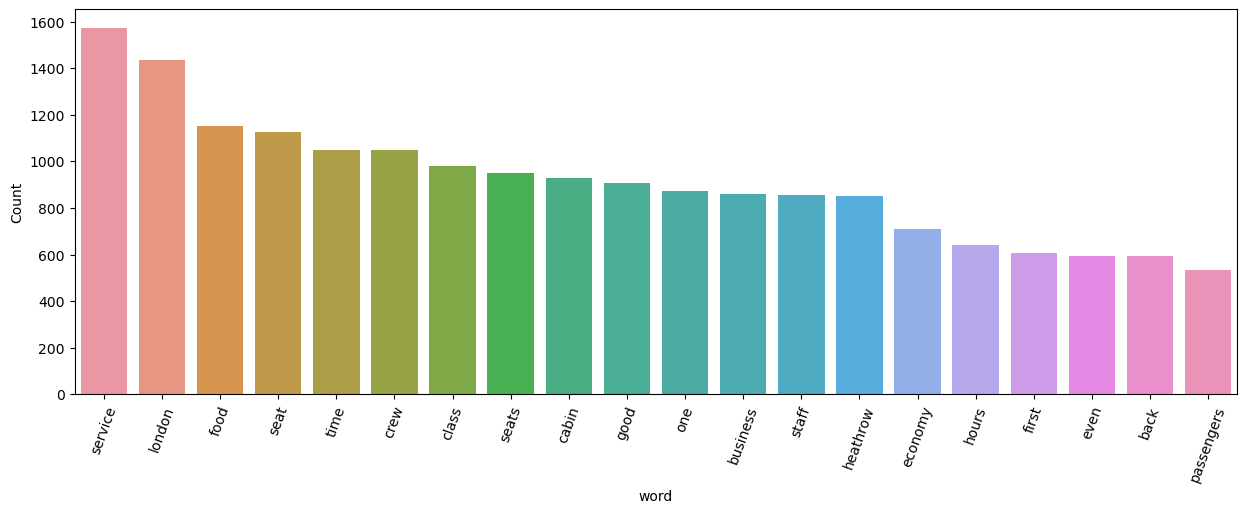

In [21]:
freq_words(reviews1)

### Sentiment Analysis

Sentiment analysis involves determining the sentiment expressed in a piece of text, whether it's positive, negative, or neutral. It's commonly employed to understand the opinions, attitudes, and emotions conveyed by individuals in reviews, social media posts, customer feedback, and other textual data.

#### Using TextBlob for Sentiment Analysis:

First, we created a Panda Series called `reviews_new` which does not have irrelevant words for analysis. The `apply` function is used to remove stopwords from each review using a list comprehension. In addition, we tokenize with the help of the Natural Language Toolkit (NLTK) library.

In [22]:
reviews_new = data_df_new['reviews'].apply(lambda x: ' '.join([word for word in word_tokenize(x) if word.lower() not in stop_words]))

In [23]:
tokenized_reviews = pd.Series(reviews_new).apply(lambda x: x.split())
tokenized_reviews

0       [flown, years, read, reviews, preparation, nee...
1       [dear, community, feel, compelled, share, utte...
2       [quick, bag, drop, first, wing, many, passenge...
3       [hours, takeoff, received, mail, stating, cryp...
4       [recently, delay, bru, lhr, due, staff, shorta...
                              ...                        
1990    [flew, johannesburg, london, heathrow, travell...
1993    [sofia, london, heathrow, time, cabin, interio...
1995    [booked, londonkuala, lumpurbandarkuala, lumpu...
1996    [space, provided, business, class, seats, ludi...
1998    [barcelona, london, anyone, told, bring, marri...
Name: reviews, Length: 1974, dtype: object

Next, we calculate the percentage of positive, negative, and neutral sentiment from the list of tokenized reviews.

In [24]:
# Initialize counters
positive_count = 0
negative_count = 0
neutral_count = 0

# Perform sentiment analysis for each tokenized review
for review in tokenized_reviews:
    # Create a TextBlob object for the tokenized review
    blob = TextBlob(" ".join(review))

    # Get sentiment polarity (-1 to 1)
    sentiment_polarity = blob.sentiment.polarity

    # Interpret the sentiment polarity
    if sentiment_polarity > 0:
        positive_count += 1
    elif sentiment_polarity < 0:
        negative_count += 1
    else:
        neutral_count += 1

# Calculate percentages
total_reviews = len(tokenized_reviews)
positive_percentage = (positive_count / total_reviews) * 100
negative_percentage = (negative_count / total_reviews) * 100
neutral_percentage = (neutral_count / total_reviews) * 100

# Print results
print(f"Total Reviews: {total_reviews}")
print(f"Positive Percentage: {positive_percentage}%")
print(f"Negative Percentage: {negative_percentage}%")
print(f"Neutral Percentage: {neutral_percentage}%")

Total Reviews: 1974
Positive Percentage: 65.09625126646404%
Negative Percentage: 33.94123606889564%
Neutral Percentage: 0.9625126646403243%
